# Modeling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
## importing datasets
quest_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/quest_df_clean_filtered.csv')
quest_df.set_index('SEQN',inplace=True)
quest_df

,BP_Presence_Yes,high_col_Don't Know,high_col_No,high_col_Yes,Smoked_100_cigs_Don't Know,Smoked_100_cigs_No,Smoked_100_cigs_Yes,drink_greater_11_Don't Know,drink_greater_11_No,drink_greater_11_Yes,...,angina_Yes,heart_attack_Don't Know,heart_attack_No,heart_attack_Yes,stroke_Don't Know,stroke_No,stroke_Yes,close_relative_heart_attack_Don't Know,close_relative_heart_attack_No,close_relative_heart_attack_Yes
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
73558,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
73559,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
73561,1,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
73562,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83723,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
83724,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
83726,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [5]:
demographic_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/demographic_df_clean_filtered.csv')
demographic_df.set_index('SEQN',inplace=True)
demographic_df

,sex,age,fam_income_poverty_ratio,Education_College graduate or above,Education_Don't Know,Education_High school graduate/GED or equivalent,Education_Less than 9th grade,Education_Refused,Education_Some college or AA degree,Marital_Status_Married,Marital_Status_Never married,Marital_Status_Separated,Marital_Status_Widowed,Ethnicity_Non-Hispanic Asian,Ethnicity_Non-Hispanic White,Ethnicity_Other Hispanic,Ethnicity_Other Race - Including Multi-Racial
SEQN,,,,,,,,,,,,,,,,,
73557,1,69,0.84,0,0,1,0,0,0,0,0,1,0,1,0,0,0
73558,1,54,1.78,0,0,1,0,0,0,1,0,0,0,0,1,0,0
73559,1,72,4.51,0,0,0,0,0,1,1,0,0,0,0,1,0,0
73561,0,73,5.00,1,0,0,0,0,0,1,0,0,0,0,1,0,0
73562,1,56,4.79,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83723,1,61,3.53,0,0,0,0,0,0,1,0,0,0,0,0,0,0
83724,1,80,3.09,0,0,1,0,0,0,1,0,0,0,0,1,0,0
83726,1,40,3.81,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [7]:
### adding height and weight from exam df 
exam_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/exam_df_clean_filtered.csv')
exam_df.set_index('SEQN',inplace=True)
exam_df

,puls_reg_nonreg,bpsy_r1,bpsy_r2,bpsy_r3,bpdi_r1,bpdi_r2,bpdi_r3,weight_kg,height_cm,bmi,waist_circum_cm,arm_circum_cm,leg_len_cm
SEQN,,,,,,,,,,,,,
73557,1.0,122.0,114.0,102.0,72.0,76.0,74.0,78.3,171.3,26.7,100.0,35.3,39.2
73558,1.0,156.0,160.0,156.0,62.0,80.0,42.0,89.5,176.8,28.6,107.6,34.7,40.0
73559,1.0,140.0,140.0,146.0,90.0,76.0,80.0,88.9,175.3,28.9,109.2,33.5,40.0
73561,1.0,136.0,134.0,142.0,86.0,88.0,86.0,52.0,162.4,19.7,87.8,25.2,36.3
73562,1.0,160.0,158.0,154.0,84.0,82.0,80.0,105.0,158.7,41.7,123.1,41.8,34.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83723,1.0,116.0,138.0,142.0,66.0,60.0,68.0,99.5,173.5,33.1,115.0,35.8,44.0
83724,1.0,164.0,168.0,168.0,70.0,66.0,66.0,77.1,176.0,24.9,92.3,31.0,38.0
83726,1.0,116.0,116.0,114.0,66.0,66.0,68.0,79.0,171.7,26.8,97.7,31.0,38.5


In [9]:
quest_demo_df =  pd.concat([demographic_df, quest_df,exam_df[['weight_kg','height_cm']]], axis=1)
quest_demo_df

,sex,age,fam_income_poverty_ratio,Education_College graduate or above,Education_Don't Know,Education_High school graduate/GED or equivalent,Education_Less than 9th grade,Education_Refused,Education_Some college or AA degree,Marital_Status_Married,...,heart_attack_No,heart_attack_Yes,stroke_Don't Know,stroke_No,stroke_Yes,close_relative_heart_attack_Don't Know,close_relative_heart_attack_No,close_relative_heart_attack_Yes,weight_kg,height_cm
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,1,69,0.84,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,78.3,171.3
73558,1,54,1.78,0,0,1,0,0,0,1,...,1,0,0,1,0,0,1,0,89.5,176.8
73559,1,72,4.51,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,1,88.9,175.3
73561,0,73,5.00,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,52.0,162.4
73562,1,56,4.79,0,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,105.0,158.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83723,1,61,3.53,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,99.5,173.5
83724,1,80,3.09,0,0,1,0,0,0,1,...,1,0,0,1,0,0,1,0,77.1,176.0
83726,1,40,3.81,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,79.0,171.7


In [303]:
# saving df for reference for other models 
quest_demo_df.to_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/final_data.csv', index=True)

### Checking Correlation

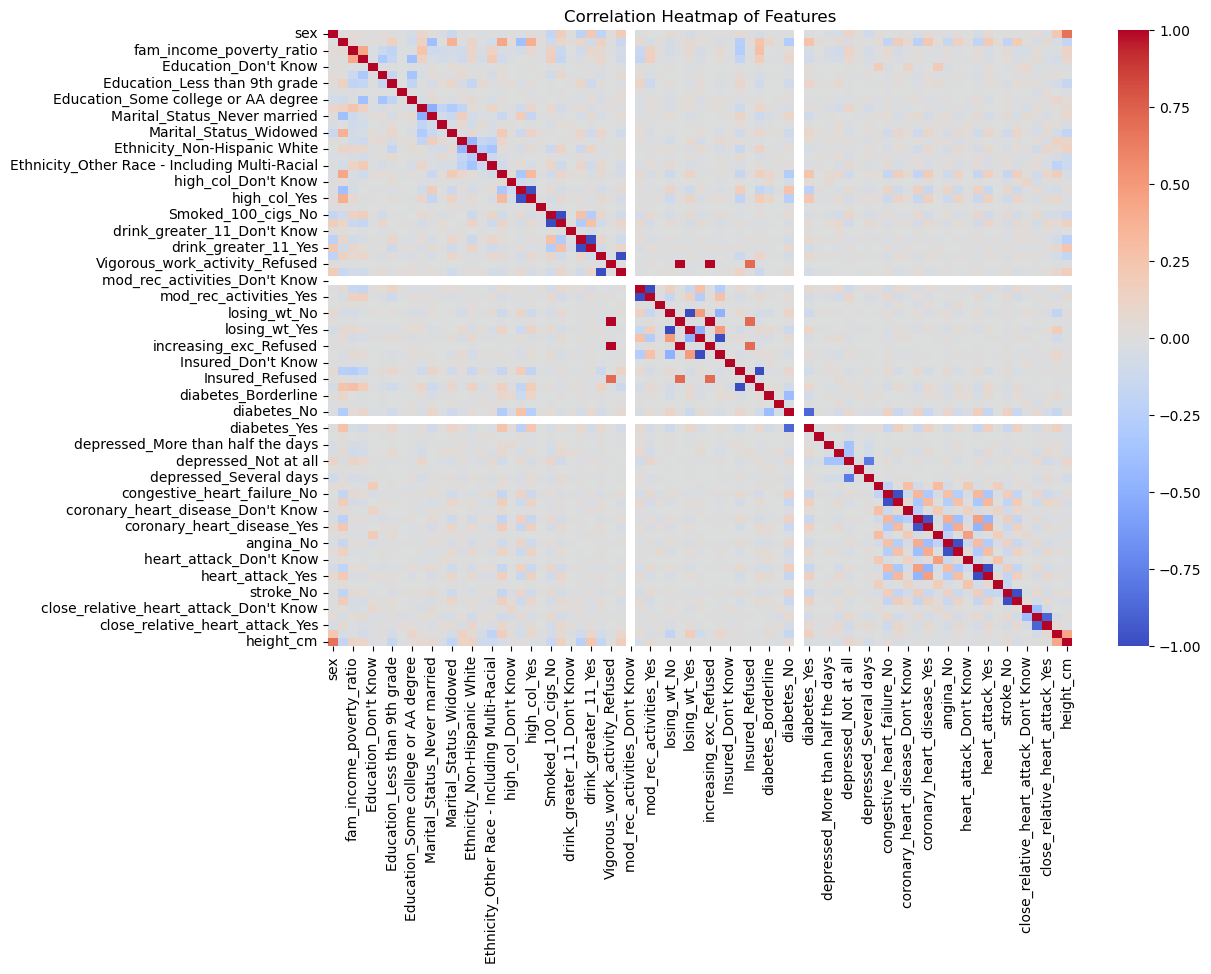

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix for all features
correlation_matrix = quest_demo_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()

## Using KMeans Clustering: Unsupervised Approach

In [30]:
existing_cvd_conditions = [
    'congestive_heart_failure_Yes', 
    'coronary_heart_disease_Yes', 
    'heart_attack_Yes',
    'stroke_Yes'
]

In [32]:
# Drop the target columns from quest_demo_df
X = quest_demo_df.drop(columns=existing_cvd_conditions)


### Scaling Data

In [35]:
# 1. Import the scaler
from sklearn.preprocessing import StandardScaler 

# make a scaler
my_standard_scaler = StandardScaler() 
X_scaled = my_standard_scaler.fit_transform(X)

# transform the data. Notice we get back a numpy array even if we put in a dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df

,sex,age,fam_income_poverty_ratio,Education_College graduate or above,Education_Don't Know,Education_High school graduate/GED or equivalent,Education_Less than 9th grade,Education_Refused,Education_Some college or AA degree,Marital_Status_Married,...,angina_Yes,heart_attack_Don't Know,heart_attack_No,stroke_Don't Know,stroke_No,close_relative_heart_attack_Don't Know,close_relative_heart_attack_No,close_relative_heart_attack_Yes,weight_kg,height_cm
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,1.046897,1.132027,-1.001922,-0.578044,-0.026866,1.855778,-0.292101,-0.013429,-0.666819,-1.036736,...,-0.155538,-0.023264,0.205634,-0.030039,-5.183565,-0.159148,0.390864,-0.347645,-0.134898,0.423649
73558,1.046897,0.274932,-0.430270,-0.578044,-0.026866,1.855778,-0.292101,-0.013429,-0.666819,0.964565,...,-0.155538,-0.023264,0.205634,-0.030039,0.192917,-0.159148,0.390864,-0.347645,0.372952,0.964473
73559,1.046897,1.303446,1.229954,-0.578044,-0.026866,-0.538858,-0.292101,-0.013429,1.499658,0.964565,...,-0.155538,-0.023264,0.205634,-0.030039,0.192917,-0.159148,-2.558433,2.876499,0.345746,0.816975
73561,-0.955204,1.360586,1.527943,1.729971,-0.026866,-0.538858,-0.292101,-0.013429,-0.666819,0.964565,...,-0.155538,-0.023264,0.205634,-0.030039,0.192917,-0.159148,-2.558433,2.876499,-1.327440,-0.451502
73562,1.046897,0.389211,1.400234,-0.578044,-0.026866,-0.538858,-0.292101,-0.013429,1.499658,-1.036736,...,-0.155538,-0.023264,-4.863012,-0.030039,0.192917,-0.159148,0.390864,-0.347645,1.075781,-0.815329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83723,1.046897,0.674910,0.633976,-0.578044,-0.026866,-0.538858,-0.292101,-0.013429,-0.666819,0.964565,...,-0.155538,-0.023264,0.205634,-0.030039,0.192917,-0.159148,0.390864,-0.347645,0.826390,0.639979
83724,1.046897,1.760563,0.366394,-0.578044,-0.026866,1.855778,-0.292101,-0.013429,-0.666819,0.964565,...,-0.155538,-0.023264,0.205634,-0.030039,0.192917,-0.159148,0.390864,-0.347645,-0.189311,0.885807
83726,1.046897,-0.525024,0.804256,-0.578044,-0.026866,-0.538858,3.423475,-0.013429,-0.666819,-1.036736,...,-0.155538,-0.023264,0.205634,-0.030039,0.192917,-0.159148,0.390864,-0.347645,-0.103158,0.462982


In [47]:
from sklearn.cluster import MiniBatchKMeans,KMeans

#Clustering with Scaled, clean demographic data 
kmeans = MiniBatchKMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled_df)

C:\Users\isouf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


In [49]:
from sklearn.decomposition import PCA

# reduce to 2d for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

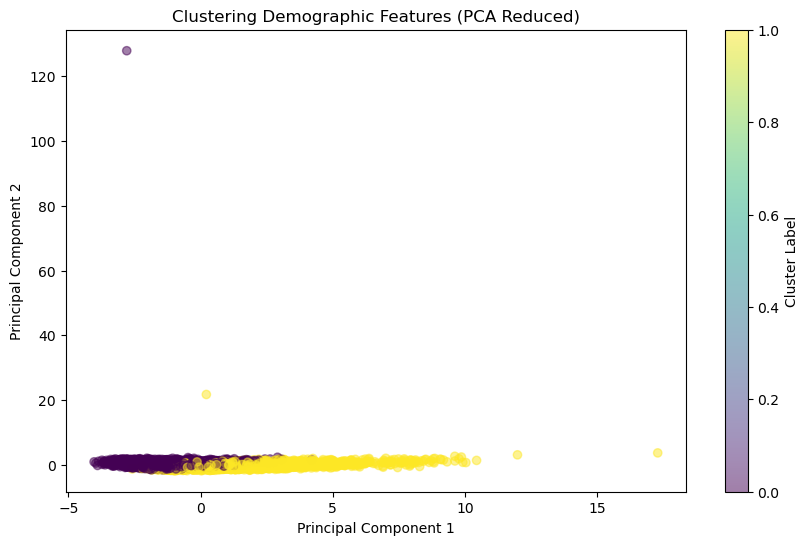

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Clustering Demographic Features (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [55]:
clustered_data = pd.DataFrame(X_scaled_df, columns=X.columns)  # X.columns are the original feature names
clustered_data['Cluster'] = cluster_labels  # Add the cluster labels to the dataframe

# Group by the cluster labels and calculate the mean for each feature within each cluster
cluster_means = clustered_data.groupby('Cluster').mean().T  # Transpose for easier readability
cluster_means

Cluster,0,1
sex,0.214504,-0.258890
age,-0.456260,0.550671
fam_income_poverty_ratio,-0.111208,0.134219
Education_College graduate or above,-0.076566,0.092410
Education_Don't Know,-0.026866,0.032425
...,...,...
close_relative_heart_attack_Don't Know,0.002288,-0.002762
close_relative_heart_attack_No,0.081640,-0.098534
close_relative_heart_attack_Yes,-0.090394,0.109098
weight_kg,0.021815,-0.026329


The clusters do not seem to distinguish at risk vs not at risk individuals effectively, lets try another approach. 

### Exploring Data Distribution

In [117]:
quest_demo_df['Education_Don\'t Know'].value_counts()

Education_Don't Know
0    5542
1       4
Name: count, dtype: int64

In [119]:
quest_demo_df['Education_Refused'].value_counts()

Education_Refused
0    5545
1       1
Name: count, dtype: int64

These values are low, I will not implement them in my logistic regression model.

## Using Logistic Regression: Supervised Approach

1. Start by filtering out individuals who already have cardiovascular disease

('congestive_heart_failure_Yes', 
    'coronary_heart_disease_Yes', 
    'heart_attack_Yes', 
    'stroke_Yes')

2. Defining target variable, symptoms

In [57]:
quest_demo_df.columns

Index(['sex', 'age', 'fam_income_poverty_ratio',
       'Education_College graduate or above', 'Education_Don't Know',
       'Education_High school graduate/GED or equivalent',
       'Education_Less than 9th grade', 'Education_Refused',
       'Education_Some college or AA degree', 'Marital_Status_Married',
       'Marital_Status_Never married', 'Marital_Status_Separated',
       'Marital_Status_Widowed', 'Ethnicity_Non-Hispanic Asian',
       'Ethnicity_Non-Hispanic White', 'Ethnicity_Other Hispanic',
       'Ethnicity_Other Race - Including Multi-Racial', 'BP_Presence_Yes',
       'high_col_Don't Know', 'high_col_No', 'high_col_Yes',
       'Smoked_100_cigs_Don't Know', 'Smoked_100_cigs_No',
       'Smoked_100_cigs_Yes', 'drink_greater_11_Don't Know',
       'drink_greater_11_No', 'drink_greater_11_Yes',
       'Vigorous_work_activity_No', 'Vigorous_work_activity_Refused',
       'Vigorous_work_activity_Yes', 'mod_rec_activities_Don't Know',
       'mod_rec_activities_No', 'mod_rec

### Setting up X and Y

In [ ]:
# Filter out at risk variables

# Step 1: Define the cardiovascular disease conditions
cvd_conditions = [
    'congestive_heart_failure_Yes', 
    'coronary_heart_disease_Yes', 
    'heart_attack_Yes', 
    'stroke_Yes'
]

no_cvd_df['have_cvd'] = quest_demo_df[cvd_conditions].max(axis=1)


# Step 2: Data Preparation
# Define the variables of interest
demographic_features = [
    'sex', 
    'age', 
    'height_cm', 
    'weight_kg', 
    'Smoked_100_cigs_Yes',
    'Ethnicity_Non-Hispanic Asian',
    'Ethnicity_Non-Hispanic White', 
    'Ethnicity_Other Hispanic',
    'Ethnicity_Other Race - Including Multi-Racial',
    'Marital_Status_Married','Marital_Status_Never married', 
    'Marital_Status_Separated','Marital_Status_Widowed',
    'Education_College graduate or above', 
    'Education_High school graduate/GED or equivalent',
    'Education_Less than 9th grade',
    'Education_Some college or AA degree'
    
]

# Create additional features based on CVD indicators
no_cvd_df['has_angina'] = quest_demo_df['angina_Yes'].astype(int)
no_cvd_df['has_family_history'] = quest_demo_df['close_relative_heart_attack_Yes'].astype(int)


# Assuming 'have_cvd' is your target variable (1 for CVD, 0 for no CVD)
X = no_cvd_df[demographic_features + ['has_angina', 'has_family_history']]
y = no_cvd_df['have_cvd']  # Make sure both 0 and 1 are present



### Test-Train Split

In [63]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
X.shape

(5546, 19)

In [67]:
y.shape

(5546,)

In [69]:
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())

y_train distribution:
 have_cvd
0    3505
1     377
Name: count, dtype: int64
y_test distribution:
 have_cvd
0    1500
1     164
Name: count, dtype: int64


### Scaling

In [84]:
ss = StandardScaler()
ss.fit(X_train)

X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

In [86]:
from sklearn.linear_model import LogisticRegression
cvd_lr = LogisticRegression(class_weight='balanced',random_state=42)
cvd_lr.fit(X_train, y_train)

C:\Users\isouf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

In [88]:
y_pred = cvd_lr.predict(X_test)

In [90]:
# Predict probabilities
y_prob = cvd_lr.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

In [186]:
# Set a custom threshold
threshold = 0.7  # Adjust this value as needed
y_pred_custom_threshold = (y_prob >= threshold).astype(int)

In [188]:
print('Accuracy with custom threshold:', accuracy_score(y_test, y_pred_custom_threshold))
print(classification_report(y_test, y_pred_custom_threshold))

Accuracy with custom threshold: 0.8587740384615384
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1500
           1       0.36      0.54      0.43       164

    accuracy                           0.86      1664
   macro avg       0.65      0.72      0.67      1664
weighted avg       0.89      0.86      0.87      1664



### Visualizing Precision-Recall Trade-off:

In [191]:
from sklearn.metrics import precision_recall_curve

In [193]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

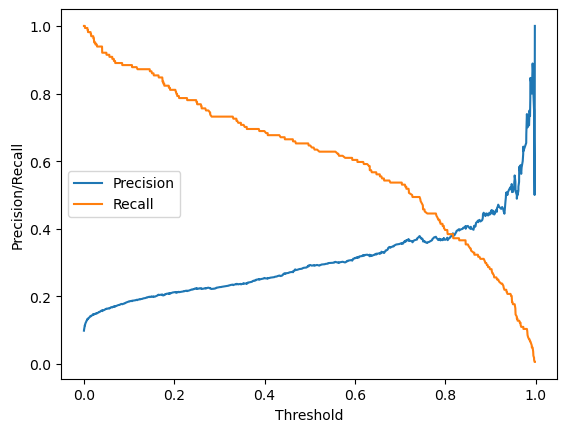

In [195]:
# Plot Precision-Recall curve
import matplotlib.pyplot as plt

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

Prioritizing Recall to detect as many true positives as possible. 

### Resampling CVD Risk column

### Combining Over- and Undersampling 



In [197]:
from imblearn.combine import SMOTEENN

In [276]:
# Create an instance of SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTE + ENN to training data
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_ss, y_train)


In [278]:
# Train the model on the resampled dataset
cvd_lr.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=42,
                   solver='saga')

In [288]:
# Evaluate the model again
y_prob = cvd_lr.predict_proba(X_test_ss)[:, 1]
y_pred_custom_threshold = (y_prob >= threshold).astype(int)

In [290]:
# Set a custom threshold
threshold = 0.7  # Adjust this value as needed
y_pred_custom_threshold = (y_prob >= threshold).astype(int)

In [292]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom_threshold))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom_threshold))
print("\nAccuracy Score:\n", accuracy_score(y_test, y_pred_custom_threshold))

Confusion Matrix:
 [[1215  285]
 [  44  120]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88      1500
           1       0.30      0.73      0.42       164

    accuracy                           0.80      1664
   macro avg       0.63      0.77      0.65      1664
weighted avg       0.90      0.80      0.84      1664


Accuracy Score:
 0.8022836538461539


### Interpretting Coefficients 

In [211]:
# extracting column names
feature_names = X_train.columns
feature_names

Index(['sex', 'age', 'height_cm', 'weight_kg', 'Smoked_100_cigs_Yes',
       'Ethnicity_Non-Hispanic Asian', 'Ethnicity_Non-Hispanic White',
       'Ethnicity_Other Hispanic',
       'Ethnicity_Other Race - Including Multi-Racial',
       'Marital_Status_Married', 'Marital_Status_Never married',
       'Marital_Status_Separated', 'Marital_Status_Widowed',
       'Education_College graduate or above',
       'Education_High school graduate/GED or equivalent',
       'Education_Less than 9th grade', 'Education_Some college or AA degree',
       'has_angina', 'has_family_history'],
      dtype='object')

In [213]:
#getting coefficients of features 
coefficients = cvd_lr.coef_[0]
coefficients

array([ 0.05851308,  0.14741264, -0.03905509,  0.03378284,  0.01833827,
       -1.86222042, -1.26272312, -2.61746625, -2.46949718, -1.89524359,
       -1.95884048, -1.27034907, -2.50204269, -2.47804613, -1.89969826,
       -3.38788657, -2.54854989,  2.29449036, -0.3036776 ])

In [215]:
# Place feature names in a dataframe
feat_df = pd.DataFrame({'Feature': feature_names})
feat_df

,Feature
0,sex
1,age
2,height_cm
3,weight_kg
4,Smoked_100_cigs_Yes
5,Ethnicity_Non-Hispanic Asian
6,Ethnicity_Non-Hispanic White
7,Ethnicity_Other Hispanic
8,Ethnicity_Other Race - Including Multi-Racial
9,Marital_Status_Married


In [217]:
#placing coefficients in dataset
coef_df = pd.DataFrame({"Coefficients": coefficients})
coef_df

,Coefficients
0,0.058513
1,0.147413
2,-0.039055
3,0.033783
4,0.018338
5,-1.862220
6,-1.262723
7,-2.617466
8,-2.469497
9,-1.895244


In [219]:
#merging feature names and coefficients in one dataframe
feat_coef = pd.concat([feat_df,coef_df], axis=1)
feat_coef

,Feature,Coefficients
0,sex,0.058513
1,age,0.147413
2,height_cm,-0.039055
3,weight_kg,0.033783
4,Smoked_100_cigs_Yes,0.018338
5,Ethnicity_Non-Hispanic Asian,-1.862220
6,Ethnicity_Non-Hispanic White,-1.262723
7,Ethnicity_Other Hispanic,-2.617466
8,Ethnicity_Other Race - Including Multi-Racial,-2.469497
9,Marital_Status_Married,-1.895244


In [221]:
feat_coef.columns = ['Feature', 'Coefficient']

# Sort the coefficients from greatest to least
feat_coef_sorted = feat_coef.sort_values(by='Coefficient', ascending=False)


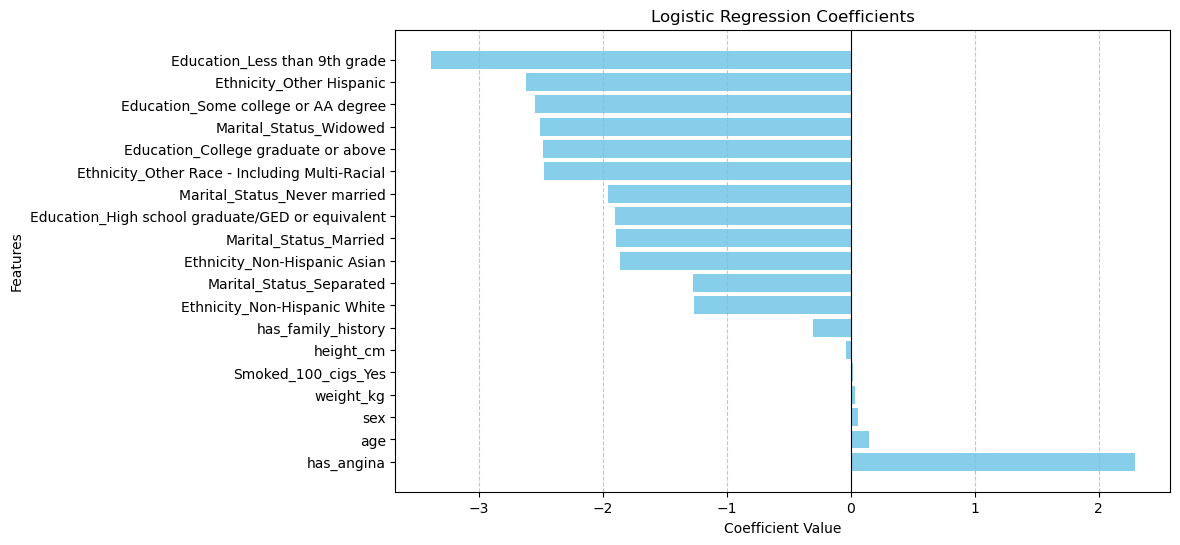

In [247]:
plt.figure(figsize=(10, 6))
plt.barh(feat_coef_sorted['Feature'], feat_coef_sorted['Coefficient'], color='skyblue')
plt.axvline(0, color='black', lw=0.8)  # Line at zero for reference
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Tuning Logistic Regression Model

In [296]:
# Define the logistic regression model with L1 regularization (lasso)
cvd_lr2 = LogisticRegression(penalty='l1', solver='saga', random_state=42, max_iter=1000)

# Set up the parameter grid to tune the C value (regularization strength)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(cvd_lr2, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, penalty='l1',
                                          random_state=42, solver='saga'),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [297]:
# Get the best model from the grid search
cvd_lr2 = grid_search.best_estimator_
cvd_lr2

LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=42,
                   solver='saga')

In [272]:
# Evaluate on train set
train_acc = cvd_lr2.score(X_train_ss, y_train)
print(f"Train accuracy with Lasso: {train_acc:.4f}")

Train accuracy with Lasso: 0.6113


C:\Users\isouf\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [274]:
# Evaluate on the test set
test_acc = cvd_lr2.score(X_test_ss, y_test)
print(f"Test accuracy with Lasso: {test_acc:.4f}")

Test accuracy with Lasso: 0.6154


C:\Users\isouf\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
